In [101]:
import pandas as pd
import numpy as np
#Scikit-Learn Imports
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, accuracy_score, precision_score, make_scorer, f1_score, recall_score
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import plotly.graph_objects as go

In [35]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.RdBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [36]:
df=pd.read_csv('BreastCancer.csv')
df.index=df['Id']
df=df.drop(columns=['Id'])

In [37]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[df.drop(columns=['Class']).columns]=imputer.fit_transform(df[df.drop(columns=['Class']).columns])

In [38]:
df.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
Id,,,,,,,,,,
1000025,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,benign
1002945,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,benign
1015425,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,benign
1016277,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,benign
1017023,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,benign


In [39]:
df['Class'].unique(), df['Cl.thickness'].unique()

(array(['benign', 'malignant'], dtype=object),
 array([ 5.,  3.,  6.,  4.,  8.,  1.,  2.,  7., 10.,  9.]))

In [40]:
df['Class'].describe()

count        699
unique         2
top       benign
freq         458
Name: Class, dtype: object

In [41]:
df.loc[df['Class']=='benign', 'Class']=0
df.loc[df['Class']=='malignant', 'Class']=1

In [42]:
x= df.drop(columns=['Class'])
y=df['Class']

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size=.20)

In [88]:
Model=RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=3, max_features='sqrt', random_state=42)
Model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [89]:
predict_train_dict = {'predict': Model.predict(x_train), 'prob': np.array([a[1] for a in Model.predict_proba(x_train)])}
predict_test_dict = {'predict': Model.predict(x_test), 'prob': np.array([a[1] for a in Model.predict_proba(x_test)])}

In [90]:
#Metrics for the Random Forest Model
print('Model being Tested: Gradient Boosting Classifier')
print('Accuracy of the model on training set: {:.2f}'.format(accuracy_score(y_train, predict_train_dict['predict'])))
print('Accuracy of the model on test set: {:.2f}'.format(accuracy_score(y_test, predict_test_dict['predict'])))
print('AUC of the model on training set: {:.2f}'.format(roc_auc_score(y_train, predict_train_dict['prob'])))
print('AUC of the model on test set: {:.2f}'.format(roc_auc_score(y_test, predict_test_dict['prob'])))
print('Classification Report for Training Set')
print(classification_report(y_train, predict_train_dict['predict']))
print('Classification Report for Test Set')
print(classification_report(y_test, predict_test_dict['predict']))

Model being Tested: Gradient Boosting Classifier
Accuracy of the model on training set: 0.98
Accuracy of the model on test set: 0.99
AUC of the model on training set: 1.00
AUC of the model on test set: 0.99
Classification Report for Training Set
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       363
           1       0.95      0.99      0.97       196

    accuracy                           0.98       559
   macro avg       0.97      0.98      0.97       559
weighted avg       0.98      0.98      0.98       559

Classification Report for Test Set
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        95
           1       0.96      1.00      0.98        45

    accuracy                           0.99       140
   macro avg       0.98      0.99      0.98       140
weighted avg       0.99      0.99      0.99       140



Confusion matrix, without normalization
[[352  11]
 [  2 194]]


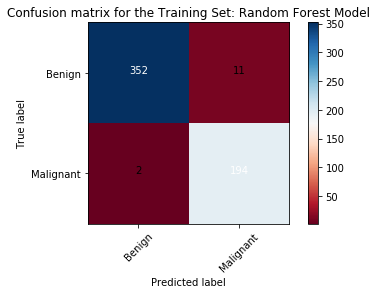

In [91]:
cm_train = confusion_matrix(y_train, predict_train_dict['predict'])
plot_confusion_matrix(cm_train, ['Benign', 'Malignant'], normalize=False, title='Confusion matrix for the Training Set: Random Forest Model')

Confusion matrix, without normalization
[[93  2]
 [ 0 45]]


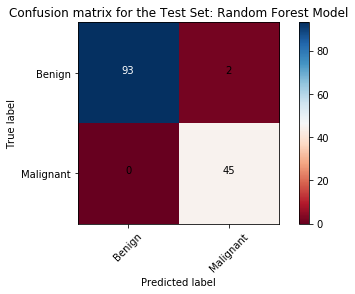

In [117]:
cm_train = confusion_matrix(y_test, predict_test_dict['predict'])
plot_confusion_matrix(cm_train, ['Benign', 'Malignant'], normalize=False, title='Confusion matrix for the Test Set: Random Forest Model')

In [93]:
df['Score']=np.array([a[1] for a in Model.predict_proba(df.drop(columns=['Class']))])
df['Prediction']=Model.predict(df.drop(columns=['Class', 'Score']))

In [113]:
thick = df[['Cl.thickness', 'Score']].groupby('Cl.thickness').mean() 
epith = df[['Epith.c.size', 'Score']].groupby('Epith.c.size').mean() 
cromatin = df[['Bl.cromatin', 'Score']].groupby('Bl.cromatin').mean() 

In [114]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=thick.index, y=thick['Score']*100,
                    mode='lines+markers',
                    name='lines+markers', 
                    line=dict(color='firebrick', width=2)))

fig.update_xaxes(tick0=2, dtick=8)

fig.update_layout(title='<b>Likelihood of Malignancy by Thickness</b>',
                  titlefont=dict(size =18, color='black', family='Adobe Garamond'),
                  xaxis=dict(tickfont=dict(family='Adobe Garamond',size=12,color='black')),
                  yaxis=dict(tickfont=dict(family='Adobe Garamond',size=12,color='black')),
                   yaxis_title='Avg Malignancy Score (%)')
fig.update_yaxes(title_font=dict(size=18, family='Adobe Garamond', color='black'))

fig.show()

In [115]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=epith.index, y=epith['Score']*100,
                    mode='lines+markers',
                    name='lines+markers', 
                    line=dict(color='firebrick', width=2)))

fig.update_xaxes(tick0=2, dtick=8)

fig.update_layout(title='<b>Likelihood of Malignancy by Epith.c.size</b>',
                  titlefont=dict(size =18, color='black', family='Adobe Garamond'),
                  xaxis=dict(tickfont=dict(family='Adobe Garamond',size=12,color='black')),
                  yaxis=dict(tickfont=dict(family='Adobe Garamond',size=12,color='black')),
                   yaxis_title='Avg Malignancy Score (%)')
fig.update_yaxes(title_font=dict(size=18, family='Adobe Garamond', color='black'))

fig.show()

In [116]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=cromatin.index, y=cromatin['Score']*100,
                    mode='lines+markers',
                    name='lines+markers', 
                    line=dict(color='firebrick', width=2)))

fig.update_xaxes(tick0=2, dtick=8)

fig.update_layout(title='<b>Likelihood of Malignancy by Bl.cromatin</b>',
                  titlefont=dict(size =18, color='black', family='Adobe Garamond'),
                  xaxis=dict(tickfont=dict(family='Adobe Garamond',size=12,color='black')),
                  yaxis=dict(tickfont=dict(family='Adobe Garamond',size=12,color='black')),
                   yaxis_title='Avg Malignancy Score (%)')
fig.update_yaxes(title_font=dict(size=18, family='Adobe Garamond', color='black'))

fig.show()

In [ ]:
df.to_csv('Analysis.csv', index=False)